# Исследование приложения Procrastinate Pro+

Заказчик исследования - владельцы развлекательного приложения Procrastinate Pro+

#### Цель исследования

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Существует гипотеза, что присутсвуют факторы, из-за которых владельцы теряют деньги

#### Ход исследования

Данные получим от заказчика.
На первом этапе требуется выгрузить их и проверить качество. Затем перейдем к проверке гипотезы.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

visits_info_short.csv - лог сервера с данными об их посещениях
orders_info_short.csv - выгрузка их покупок за этот период
costs_info_short.csv - рекламные расходы.

**Структура visits_info_short.csv**:  
 User Id — уникальный идентификатор пользователя,  
 Region — страна пользователя,  
 Device — тип устройства пользователя,  
 Channel — идентификатор источника перехода,  
 Session Start — дата и время начала сессии,  
 Session End — дата и время окончания сессии.  
 
**труктура orders_info_short.csv**:  
 User Id — уникальный идентификатор пользователя,  
 Event Dt — дата и время покупки,  
 Revenue — сумма заказа.  
 
**Структура costs_info_short.csv**:  
 dt — дата проведения рекламной кампании,  
 Channel — идентификатор рекламного источника,  
 costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Загрузим данные

In [498]:
import time
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from datetime import date, timedelta as td
from datetime import datetime, timedelta

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')

In [499]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv')  # траты на рекламу
)

#### Проверим данные и переименуем столбцы

In [500]:
#загрузим таблицы и посмотрим на данные
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [501]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [502]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [503]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [504]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [505]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


На первый взгляд можно сказать, что требуется поменять формат данных в столбцах с датами и привести название всех столбцов к единому стилю.

In [506]:
#переименуем колонки и приведем названия к единому стилю
visits.columns = [name.lower().replace(' ', '_') for name in visits.columns]
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]
costs.columns = [name.lower().replace(' ', '_') for name in costs.columns]

In [507]:
#поменяем тип данных в колонках с датами
visits.session_start = pd.to_datetime(visits.session_start)
visits.session_end = pd.to_datetime(visits.session_end)
orders.event_dt = pd.to_datetime(orders.event_dt)
costs.dt = pd.to_datetime(costs.dt).dt.date

In [508]:
display(visits.head(), orders.head(), costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


Проверим данные на явные дубликаты и пропуски.

In [509]:
display(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())

0

0

0

In [510]:
display(visits.isna().sum(), orders.isna().sum(), costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

#### Промежуточный итог

В ходе проверки явные дубликаты и пропуски в таблицах не выялены. Мы привели в порядок столбцы с данными о времени и переименовали заголовки столбцов всех таблиц, приведя их к единому стилю. Перейдем к самому анализу.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [511]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [512]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [513]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [514]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi
    
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [515]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [516]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [517]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [518]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xticks(rotation=45)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xticks(rotation=45)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xticks(rotation=45)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [519]:
#Получим профили пользователей.
#Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.

# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


Чтобы задать момент анализа, опеределим минимальню и максимальную дату привлечения.

In [520]:
# определите доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print('Период привлечения пользователей:', min_analysis_date, observation_date, sep=' - ')

Период привлечения пользователей: - 2019-05-01 - 2019-10-27


Рассчитаем размеры когорт привлеченных пользователей за весь период наблюдений.

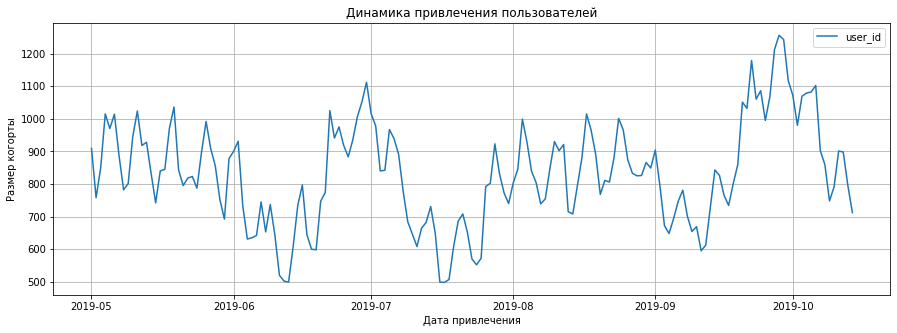

In [521]:
report = (
    profiles.query('@min_analysis_date <= dt and dt <= @max_analysis_date')
    .groupby('dt')
    .agg({'user_id':'nunique'})
)

report.plot(grid=True, figsize=(15, 5))  
plt.title('Динамика привлечения пользователей')  # название графика
plt.xlabel('Дата привлечения')  # название оси X
plt.xticks()  # угол наклона подписей на оси X
plt.ylabel('Размер когорты')   # название оси Y
plt.show()

В рекламных компаниях видны как пики, так и провалы в привлечении клиентов. Так как кривая напоминает колебательную кривую, то можно предположить, что это связано с сезонностью. Чтобы подтвердить или опровергнуть эту теории, изучим сами рекламные компании.

In [522]:
#рассчитаем средний размер когорты
mean_daily_cohort_size = report.mean()
mean_daily_cohort_size.astype(int)

user_id    830
dtype: int64

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [523]:
#создадим сводную таблицу и разделим пользователей на платящих и неплатящих
country = profiles.pivot_table(index = 'region', columns = 'payer', \
                               values = 'user_id', aggfunc = 'count') \
                  .rename(columns={True:'payer', False:'not_payer'}) \
                  .sort_values('payer', ascending=True)
country.head()

payer,not_payer,payer
region,,
Germany,14365,616
France,16787,663
UK,16875,700
United States,93100,6902


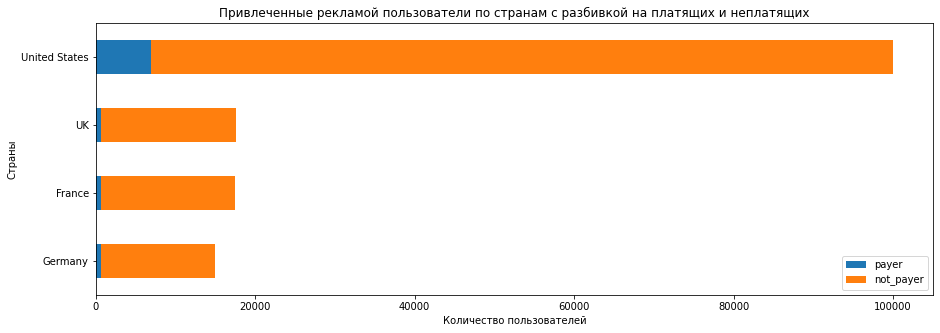

In [524]:
#построим график
fig, ax = plt.subplots(figsize=(15, 5))

country[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax)

ax.legend()
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Страны')
ax.set_title('Привлеченные рекламой пользователи по странам с разбивкой на платящих и неплатящих')
plt.show()

Подавляющее число пользователей приложением - это жители США. За ними следуют Великобритания, Франция и Германия. Чтобы определить, в какой стране самая большая доля платящих пользователей, построим таблицу.

In [525]:
#создадим табрицу с размерами когорт платящих и неплатящих пользователей,
# а также долей платящих клиентов от общего числа когорты
country['share_payer'] = (country.payer / (country.payer + country.not_payer) * 100)
country.sort_values('share_payer', ascending=False)

payer,not_payer,payer,share_payer
region,,,
United States,93100,6902,6.90
Germany,14365,616,4.11
UK,16875,700,3.98
France,16787,663,3.80


Доли распределили немного иначе. США лидирует как по количеству пользователей, так и по доле платящих. А вот Германия вышла на второне место, незначительно, но опережая Великобританию и Францию.

In [526]:
# Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи
# для начала создадим сводную таблицу
device = profiles.pivot_table(index = 'device', columns = 'payer', \
                              values = 'user_id', aggfunc = 'count') \
                 .rename(columns={True:'payer', False:'not_payer'}) \
                 .sort_values('payer', ascending=True)
device.head()

payer,not_payer,payer
device,,
PC,28918,1537
Mac,28130,1912
Android,32982,2050
iPhone,51097,3382


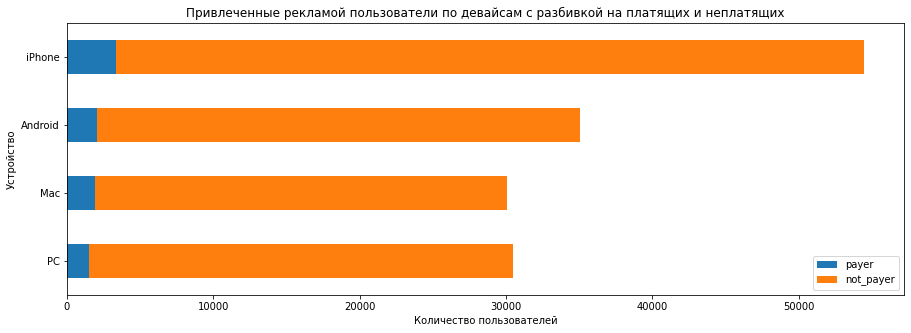

In [527]:
#построим график
fig, ax = plt.subplots(figsize=(15, 5))

device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax)

ax.legend()
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Устройство')
ax.set_title('Привлеченные рекламой пользователи по девайсам с разбивкой на платящих и неплатящих')
plt.show()

Большинство привлеченных пользователей приложения - это владельцы iPhone. Первые два места занимают пользователи мобильных устройств, на них приходится больше половины всех пользователей. Третье и четвертое место занимают пользователи Мак и ПК. Узнаем, как распределились доли платящих пользователей, построив таблицу.

In [528]:
#создадим табрицу с размерами когорт платящих и неплатящих пользователей,
# а также долей платящих клиентов от общего числа когорты
device['share_payer'] = (device.payer / (device.payer + device.not_payer) * 100)
device.sort_values('share_payer', ascending=False)

payer,not_payer,payer,share_payer
device,,,
Mac,28130,1912,6.36
iPhone,51097,3382,6.21
Android,32982,2050,5.85
PC,28918,1537,5.05


Самая большая доля платящих клиентов среди пользователей Мак, затем идет iPhone, и уже после этого Андроид и Пк.

In [529]:
# Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей
# для начала создадим сводную таблицу
channel = profiles.pivot_table(index = 'channel', columns = 'payer', \
                               values = 'user_id', aggfunc = 'count') \
                  .rename(columns={True:'payer', False:'not_payer'}) \
                  .sort_values('payer', ascending=True)
channel.head()

payer,not_payer,payer
channel,,
MediaTornado,4208,156
YRabbit,4147,165
lambdaMediaAds,1924,225
OppleCreativeMedia,8372,233
LeapBob,8291,262


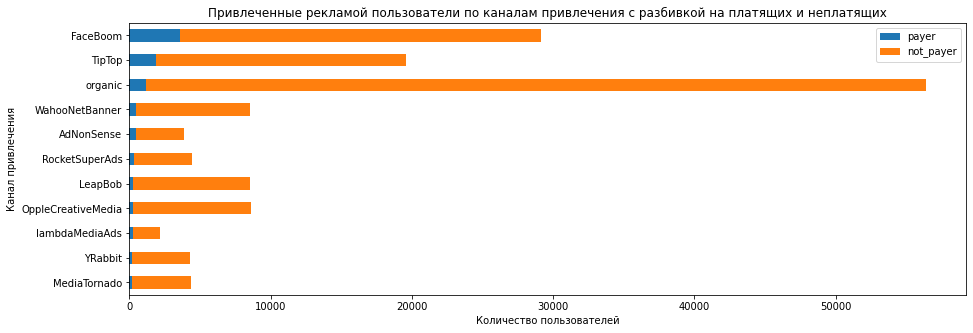

In [530]:
#строим график
fig, ax = plt.subplots(figsize=(15, 5))

channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax)

ax.legend(bbox_to_anchor = (1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Канал привлечения')
ax.set_title('Привлеченные рекламой пользователи по каналам привлечения с разбивкой на платящих и неплатящих')
plt.show()

Больше всего переходов в приложение было органических, но доля платящих самая высокая среди привлеченных клиентов с рекламы. Лучше всех сработала реклана в ФейсБум и ТипТоп . Посмотрим, как распределяются доли платящих, построив таблицу.

In [531]:
#создадим табрицу с размерами когорт платящих и неплатящих пользователей,
# а также долей платящих клиентов от общего числа когорты
channel['share_payer'] = (channel.payer / (channel.payer + channel.not_payer) * 100)
channel.sort_values('share_payer', ascending=False)

payer,not_payer,payer,share_payer
channel,,,
FaceBoom,25587,3557,12.20
AdNonSense,3440,440,11.34
lambdaMediaAds,1924,225,10.47
TipTop,17683,1878,9.60
RocketSuperAds,4096,352,7.91
WahooNetBanner,8100,453,5.30
YRabbit,4147,165,3.83
MediaTornado,4208,156,3.57
LeapBob,8291,262,3.06


Безусловным лидером остается рекламная компания в ФейсБум. Но второе и третье места занимают АдНонСенсе и ЛямбаМедиаАдс. Органика, хоть и привлекла больше всего пользователей, имеет самую низкую долю платящих клиетов. Но можно отдельно выделить, что эти переходы для приложения бесплатны.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [532]:
#проссумируем все расходы на рекламу за весь период, они указаны в колонке costs таблицы costs
costs_sum = costs['costs'].sum()
costs_sum

105497.30000000002

In [533]:
#округлим до реальных значений
print('Рекламный бюджет составил:', round(costs_sum, 2))

Рекламный бюджет составил: 105497.3


In [534]:
# выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник
# для начала создадим сводную таблицу
costs_expenses = costs.pivot_table(index='channel', values='costs', aggfunc='sum') \
                .sort_values('costs', ascending=False)
costs_expenses

,costs
channel,
TipTop,"54,751.30"
FaceBoom,"32,445.60"
WahooNetBanner,"5,151.00"
AdNonSense,"3,911.25"
OppleCreativeMedia,"2,151.25"
RocketSuperAds,"1,833.00"
LeapBob,"1,797.60"
lambdaMediaAds,"1,557.60"
MediaTornado,954.48


In [535]:
#посчитаем в процентном соотношении от общего объема трат
costs_expenses['proc'] = costs_expenses['costs'] / costs_sum * 100
costs_expenses

,costs,proc
channel,,
TipTop,"54,751.30",51.90
FaceBoom,"32,445.60",30.75
WahooNetBanner,"5,151.00",4.88
AdNonSense,"3,911.25",3.71
OppleCreativeMedia,"2,151.25",2.04
RocketSuperAds,"1,833.00",1.74
LeapBob,"1,797.60",1.70
lambdaMediaAds,"1,557.60",1.48
MediaTornado,954.48,0.90


Согласно таблице, дороже всех обошлась реклама в ТипТоп, хотя она и не привлекла самого большого количества платящих пользователей. ФейсБум находится на втором месте. Эти два источника потратили более 80 процентов общего рекламного бюджета.

In [536]:
# Построим график с визуализацией динамики изменения расходов во времени
# по неделям по каждому источнику
# создадим колонки обозначения недель и месяцев
costs.dt = pd.to_datetime(costs.dt)
costs['week'] = costs.dt.dt.week
costs['month'] = costs.dt.dt.month

# затем создадим сводную таблицу по неделям
fig_costs = costs.pivot_table(index='week', values='costs', aggfunc='sum', columns='channel')
fig_costs.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.70,16.80,38.64,24.00,99.45,347.00,49.20,52.20,81.60
19,273.00,750.20,31.71,61.68,34.50,139.23,470.00,92.40,75.90,103.20
20,265.65,755.70,26.67,59.04,27.50,138.06,454.00,90.00,69.30,90.40
21,266.70,722.70,26.67,50.16,34.25,131.04,801.80,79.20,65.40,119.20
22,202.65,"1,208.90",65.52,36.96,81.75,97.70,"1,421.20",179.40,49.80,83.20


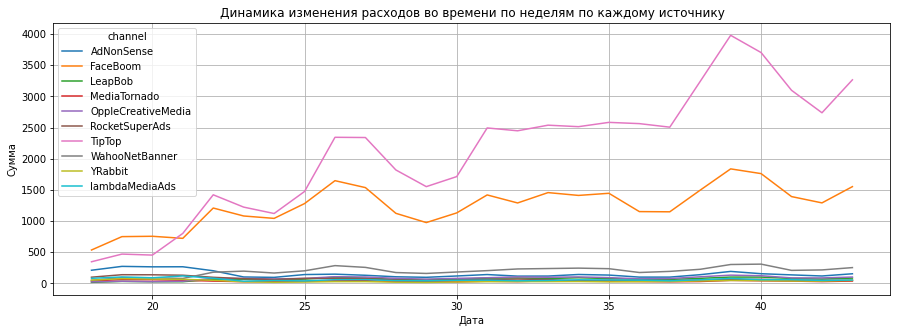

In [537]:
# построим график расходов по месяцам
fig_costs.plot(grid = True, figsize=(15, 5))
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.title('Динамика изменения расходов во времени по неделям по каждому источнику')
plt.show()

На графике так же отчетливо видны две самые дорогие рекламные компании, причем ТипТоп с каждым месяцем становился всё "прожорливее". ФейсБум с момента запуска подорожал приблизительо вдвое. Остальные рекламные компании показывают стабильную динамику расходов во времени, а АдНонСенсе со временем стал приносить более дешевых платящих клиентов.

In [538]:
# посчитаем, во сколько обошлось привлечение каждого пользователя
# для этого сначала создадим свобдные таблицы по неделям и по месяцам
report_week = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
report_week.head()

week,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
channel,,,,,,,,,,,,,,,,,,,,,,,,,,
AdNonSense,211.05,273.00,265.65,266.70,202.65,102.90,96.60,141.75,148.05,130.20,106.05,97.65,118.65,141.75,116.55,117.60,142.80,133.35,100.80,100.80,139.65,192.15,155.40,136.50,118.65,154.35
FaceBoom,535.70,750.20,755.70,722.70,"1,208.90","1,081.30","1,042.80","1,280.40","1,647.80","1,536.70","1,124.20",975.70,"1,130.80","1,419.00","1,290.30","1,456.40","1,411.30","1,445.40","1,151.70","1,148.40","1,496.00","1,837.00","1,761.10","1,392.60","1,291.40","1,552.10"
LeapBob,16.80,31.71,26.67,26.67,65.52,66.99,52.29,68.46,99.75,87.36,62.58,61.11,67.20,83.58,87.57,77.49,90.51,77.91,66.99,63.84,81.27,101.22,101.01,78.96,69.72,84.42
MediaTornado,38.64,61.68,59.04,50.16,36.96,27.60,29.76,32.16,40.56,43.44,28.80,26.40,25.20,35.04,29.04,40.80,35.28,33.84,30.24,25.92,30.24,48.24,42.00,36.96,29.04,37.44
OppleCreativeMedia,24.00,34.50,27.50,34.25,81.75,79.50,71.50,79.75,107.00,102.50,81.00,68.00,80.75,90.75,104.00,98.50,103.75,92.75,72.75,78.00,105.75,132.25,123.00,88.25,88.00,101.50


In [539]:
report_month = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')
report_month.head()

month,5,6,7,8,9,10
channel,,,,,,
AdNonSense,"1,169.70",538.65,504.00,579.60,581.70,537.60
FaceBoom,"3,524.40","5,501.10","5,294.30","6,274.40","6,114.90","5,736.50"
LeapBob,140.28,314.58,313.53,369.81,343.98,315.42
MediaTornado,238.56,138.00,138.48,154.56,144.72,140.16
OppleCreativeMedia,169.75,370.00,366.50,439.25,427.75,378.00


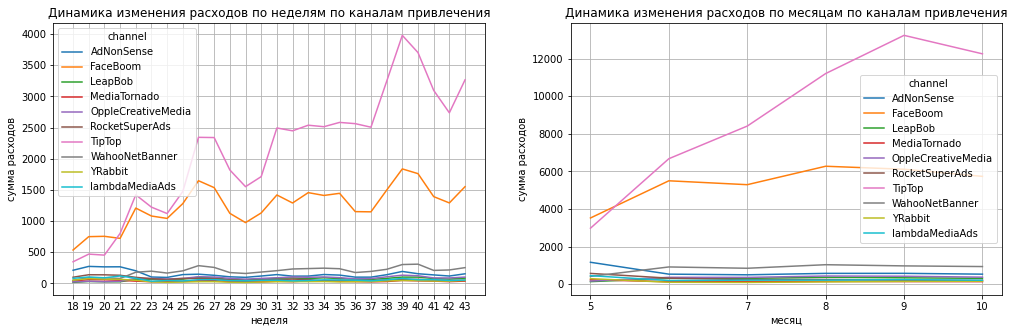

In [540]:
# построим графики

plt.figure(figsize=(17, 5))

report_week.T.plot(
    grid=True, xticks=list(report_week.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Динамика изменения расходов по неделям по каналам привлечения')
plt.xlabel('неделя')
plt.ylabel('сумма расходов')

report_month.T.plot(
    grid=True, xticks=list(report_month.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика изменения расходов по месяцам по каналам привлечения')
plt.xlabel('месяц')
plt.ylabel('сумма расходов')
plt.show()

Прекрасно видно, что самая дорогая неделя была в сентябре, когда половину всех рекламных средств за этот период "съел" ТипТоп. Пришло время оценить, насколько окупились рекламные компании. Для этого узнаем стоимость привлечения каждого пользователя - CAC. 

In [541]:
# Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
# для этого сначала создадим сводную таблицу, используя профили пользователей
cac_profiles = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean') \
                      .sort_values(by='acquisition_cost', ascending=False) \
                      .rename(columns={'acquisition_cost':'cac'})
# выведем процент от общей суммы САС
cac_profiles['proc'] = (cac_profiles['cac'] / cac_profiles['cac'].sum()) * 100
cac_profiles

,cac,proc
channel,,
TipTop,2.80,37.04
FaceBoom,1.11,14.73
AdNonSense,1.01,13.34
lambdaMediaAds,0.72,9.59
WahooNetBanner,0.60,7.97
RocketSuperAds,0.41,5.45
OppleCreativeMedia,0.25,3.31
YRabbit,0.22,2.90
MediaTornado,0.22,2.89


Пользователи ТипТоп обошлись почти в три раза дороже, чем ФейсБум. Один привлеченный пользователь ТипТоп стоил 37% бюджета привлеченных пользователей через все остальные каналы. Клиенты, через органику бесплатны, поэтому в этой колонке мы видим нули.

Ранее мы обратили внимание, что количество привлеченных пользователей за весь период проведения рекламных компаний колеблется во времени, хотя сами рекламные компании стабильно транслировались весь период. Следовательно теория о сезонности интересов пользователей к приложению подтвердилась.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [542]:
# зададим горизонт и момент времени согласно заданию
# окупаемость 2 недели - горизонт анализа, момент времени 1 ноября 2019 года

observation_date = datetime(2019, 10, 1).date()
horizon_days = 14

In [543]:
# исключим из анализа пользователей органики, так как они были бесплатными и будут "размывать" анализ
profiles = profiles.query('channel != "organic"')

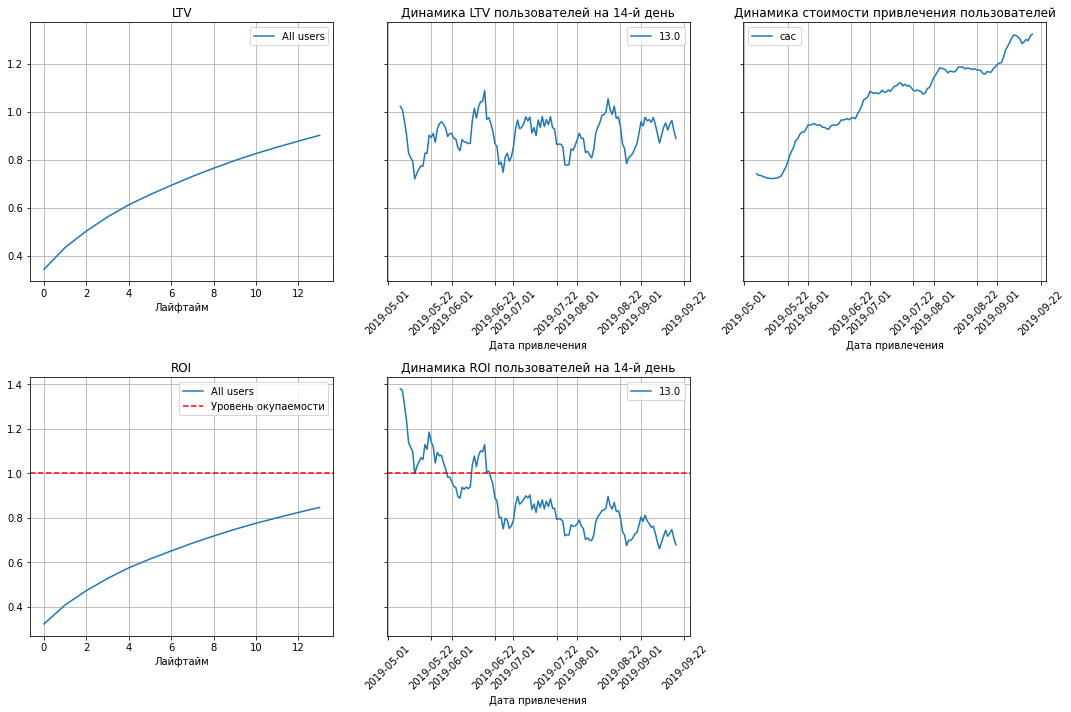

In [544]:
# Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Согласно графикам можно однозначно сказать, что реклама не окупается, ROI в конце двух недель чуть более 80%. САС стабильно растет, а это значит, что растут рекламы на рекламу, независимо от того, что она не приносит эффективность. На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. ROI в динамике стремительно падает. Значит, дело не в ухудшении качества пользователей, а в рекламных компаниях.

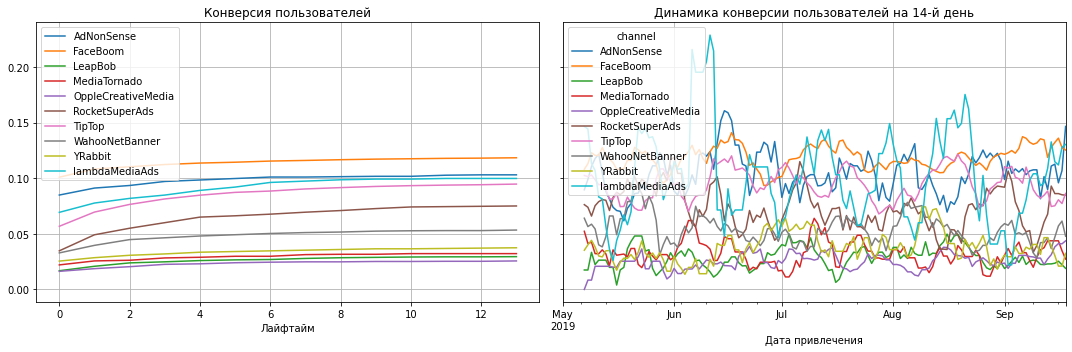

In [545]:
# Проверим конверсию пользователей и динамику её изменения
# в зависимости от рекламного источника
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        analysis_horizon, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Самые "качественными" клиенты были привлечены через ФейсБум, АдНонСенсе и ЛямбдаМедиаАдс. Причем последняя, согласна графику динамики, особенно выделилась в июне месяце, где показала большой скачок. В динамике ФейсБум по-прежнему отличается стабильно высокой конверсией.

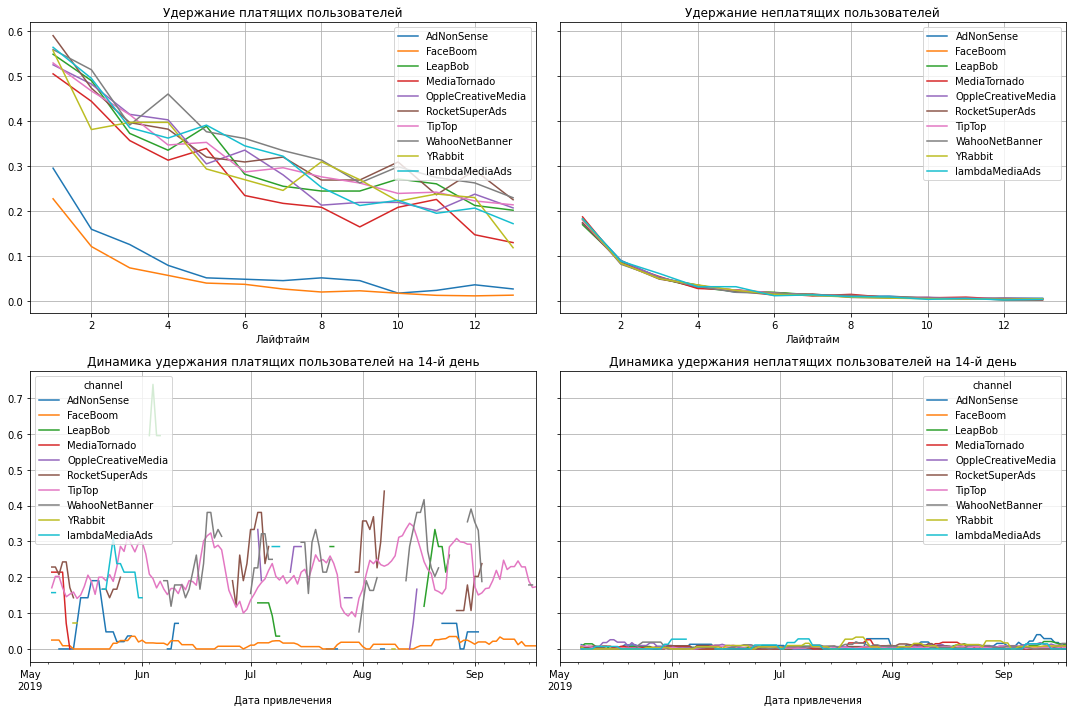

In [546]:
# Проверим удержание пользователей и динамику его изменения
# в зависимости от рекламного источника

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Несмотря на хорошие показатели рекламных компаний ФейсБум и АдНонСенсе, они неожиданно показали самое плохое удержание привлеченных пользователей среди платящих, остальные источники колеблются с приблизительно одинаковыми показателями удержания. Отдельно можно отметить самые плохие показатели удержания пользователей ФейсБум в динамике, которые колеблются около нуля. Это означает, что почти все платящие пользователи из рекламной компании ФейсБум по тем или иным причинам покидают приложение. Следует разобраться в обещаниях, которые продвигаются в рекламной компании ФейсБум. По неплатящим пользователем динамика всех показателей по всем рекламным компаниям приблизительно одинакова.

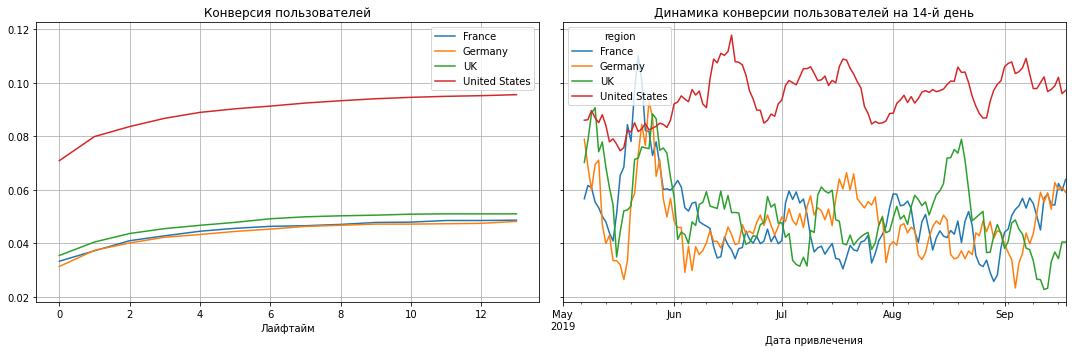

In [547]:
# Проверим конверсию пользователей и динамику её изменения
# в зависимости от страны
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        analysis_horizon, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Больше всего пользователей привлекли рекламные компании в США. В динамике на первоначальном этапе распределение по странам не сильно разнилось, но после того, как рекламная компания ТипТопа пробила потолок бюджетов, США по конверсии ушло в отрыв.

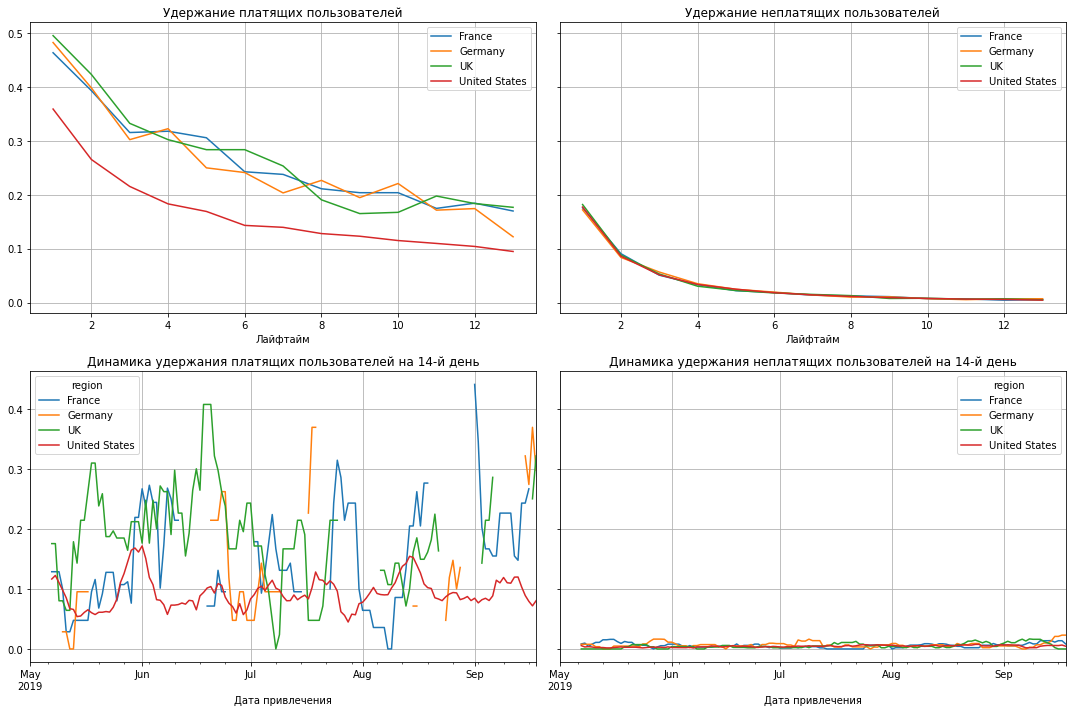

In [548]:
# Проверим удержание пользователей и динамику его изменения
# в зависимости от страны

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Хуже всех среди платящих пользователей в Приложении удержались те, которые жили в США. Остальные страны находятся приблизительно в одной плоскости. Это очередное подтверждение того, что с рекламными компаниями в США что-то не так. Остальные графики малоинформативны.

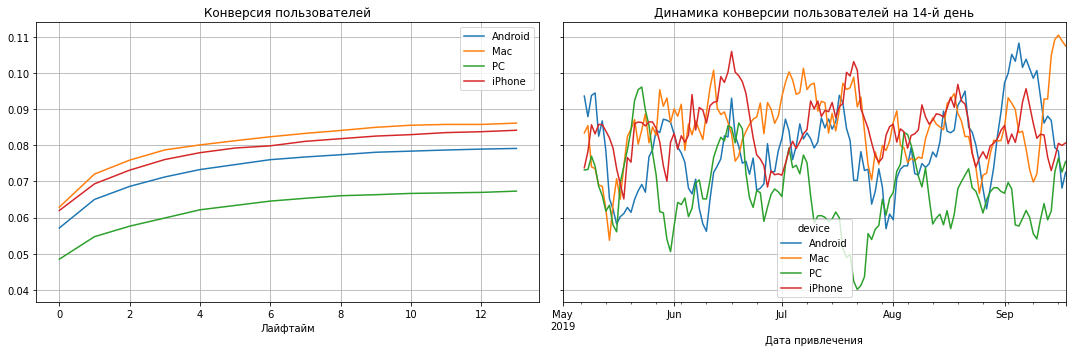

In [549]:
# Проверим конверсию пользователей и динамику её изменения
# в зависимости от устройства
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        analysis_horizon, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Охотнее всего на рекламу отзывались пользователи Мак и iPhone. Меньше всего интересовались рекламой пользователи ПК. Эта же зависимость выявляется в динамике. Стоит проверить, как выглядит реклама с ПК.

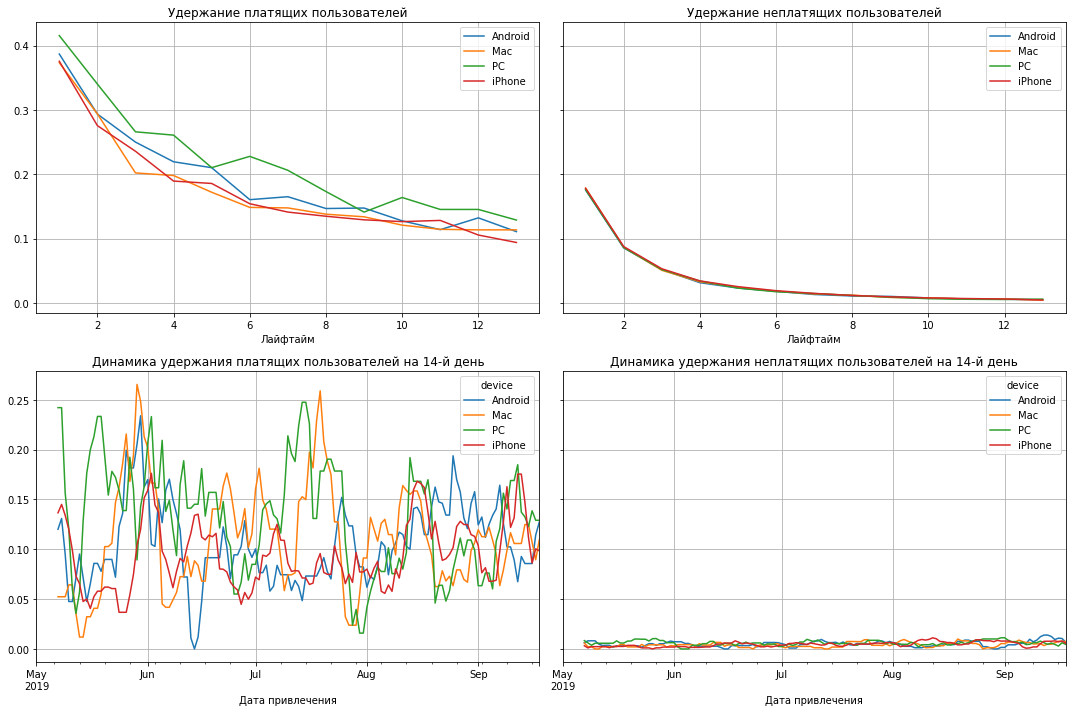

In [550]:
# Проверим удержание пользователей и динамику его изменения
# в зависимости от устройства

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Хотя платящие пользователи ПК меньше всего замечали рекламу, они охотнее оставались после того, как совершали покупку. В отличии от Мак и iPhone. Пользователи этих устройств хоть и совершали первую покупку, после этого чаще покидали сервис. Рекомендую еще раз проверить описание и возможности рекламной компании для этих устройств. 

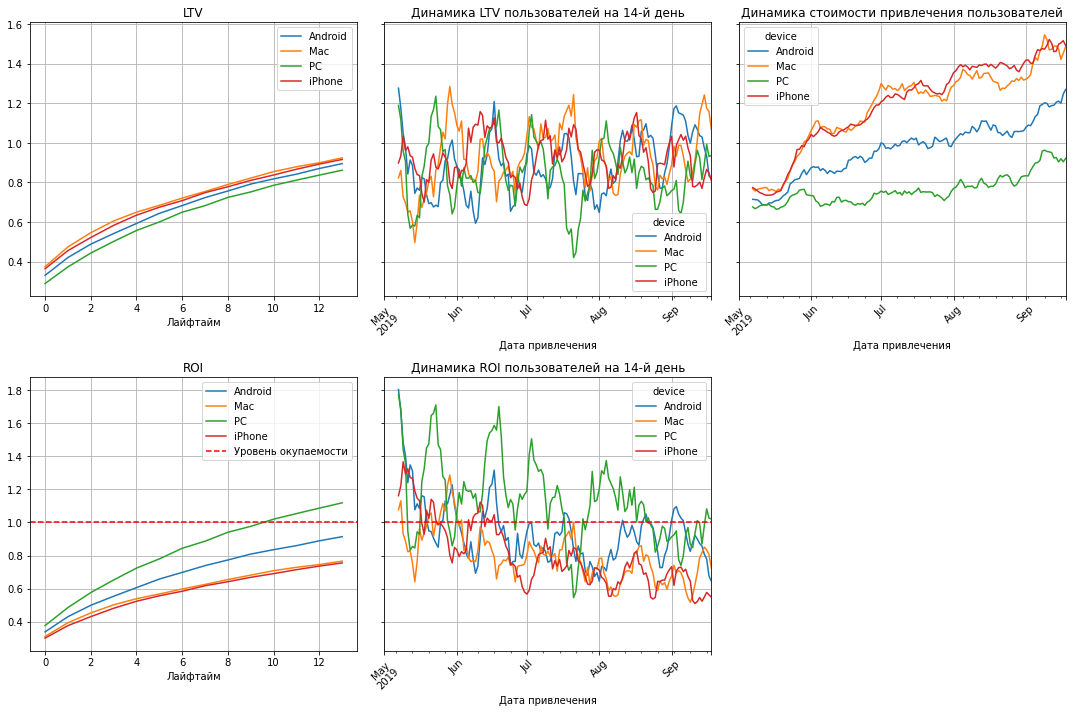

In [551]:
# Проанализируем окупаемость рекламы с разбивкой по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = \
get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Самыми прибыльными были пользователь Мак, противоположные им - это пользователи iPhone. Отдельно стоит отметить, что Пк и Мак занимают первое и второе место по прибыльности клиентов, возможно, стоит присмотреться к возможностям мобильных приложений. Самыми выгодными для рекламы оказались клиенты ПК, самыми дорогими iPhone и Мак. Здесь рекомендую проверить, через какие рекламные компании чаще всего переходили пользователи, у которых поисковой интерфейс отличается от ПК и Андроид. По окупаемости вышли в плюс только пользователи ПК, остальные клиенты не принесли прибыли. В динамике на 14-й день пользователи ПК также чаще всего приносили прибыль.

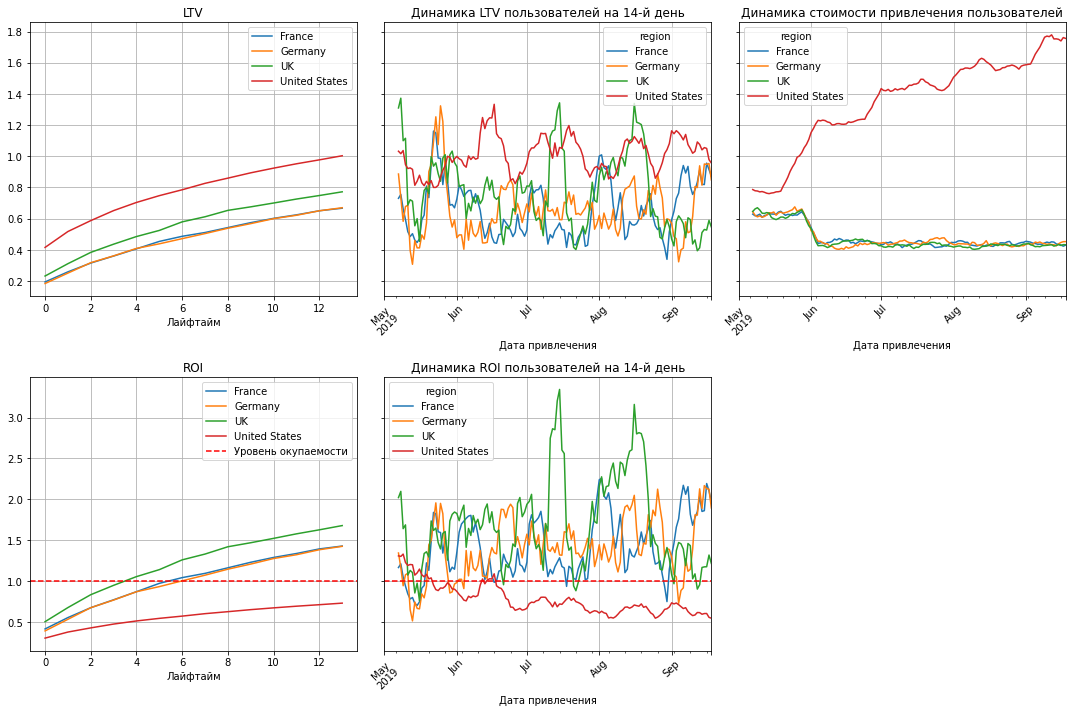

In [552]:
# Проанализируем окупаемость рекламы с разбивкой по странам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = \
get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Самую высокую прибыль принесли пользователи, проживающие в США. Хуже остальных показатели Германии и Франции. В динамике по прибыльности пользователей также лидирует США, но по графику стоимости привлеченных клиентов можно увидеть аномалию: резкий скачок стоимости привлеченного клиента из США с одновременным падением в остальных странах. Следует проверить доминирующий источник привлечения в США. По окупаемости на 14й вышли в плюс все страны, кроме США. Из-за большого количества клиентов в этой стране она "утянула" в минус большинство предыдущих показателей, которые мы анализировали выше, что подтверждает динамика ROI на 14 день.

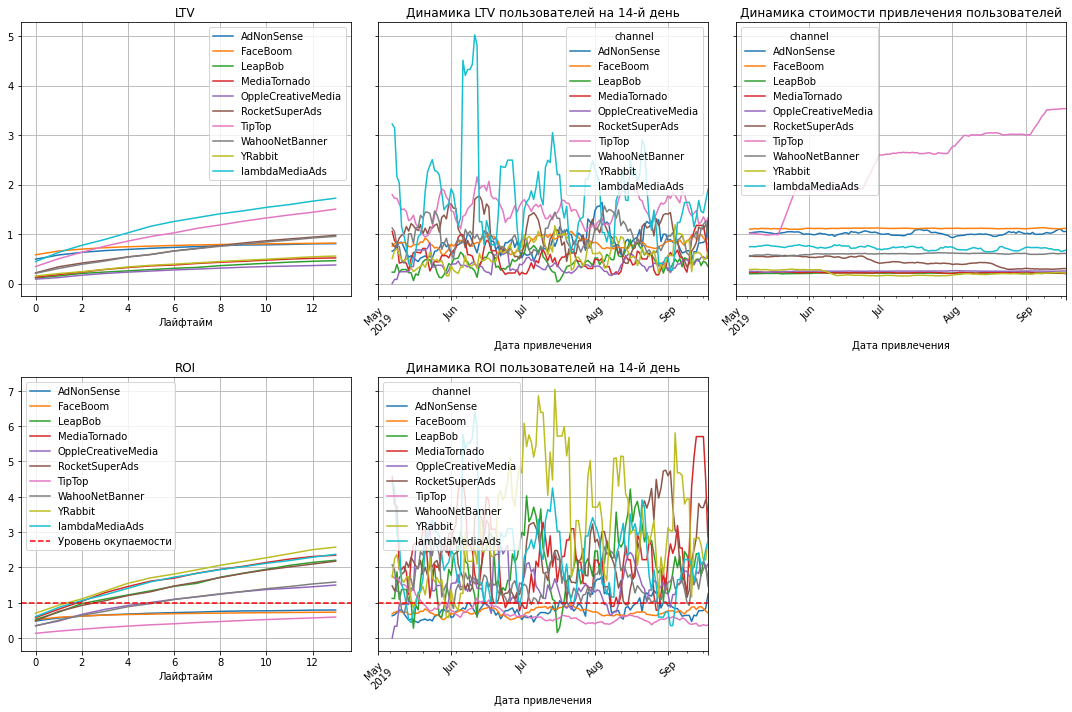

In [553]:
# Проанализируем окупаемость рекламы с разбивкой по рекламным компаниям
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = \
get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

Больше всех прибыли принесли клиенты из рекламных компаний в ЛямбдаМедиаАдс и ТипТоп. В динамике они также выше остальных. Что касается стоимости привлечения, видим резкий всплеск в рекламном канале ТипТоп, который напоминает всплеск стоимости по странам, где США забрала на себя большую часть бюджета. Если вспоминть про то, что пользователи с ТипТоп стали самыми дорогими для нас, то можно сделать предварительные выводы, что из-за чрезмерного потребления бюджетов рекламная компания ТипТоп в США нанесла непоправимый ущерб всей рекламной компании в целом. Эту же закономерность видим на графиках ROI.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Целью нашей работы было выявление причин, по которым не окупились рекламные компании развлекательного Приложения. Для этого мы проанализировали файлы с данными об источниках перехода, стоимостью рекламных компаний и покупками, чтобы найти закономерности убыточности.

Для начала мы оценили количество привлеченных пользователей в целом. В рекламных компаниях были видны как пики, так и провалы в привлечении клиентов. Так как кривая напоминала колебательную кривую, то можно предположить, что это связано с сезонностью. Чтобы подтвердить или опровергнуть эту теории, мы изучили сами рекламные компании.

Подавляющее число пользователей приложением - это жители США. За ними следуют Великобритания, Франция и Германия. Чтобы определить, в какой стране самая большая доля платящих пользователей, построили таблицу.

Доли в таблице распределись немного иначе. США лидирует как по количеству пользователей, так и по доле платящих. А вот Германия вышла на второне место, незначительно, но опережая Великобританию и Францию.

Большинство привлеченных пользователей приложения - это владельцы iPhone. Первые два места занимают пользователи мобильных устройств, на них приходится больше половины всех пользователей. Третье и четвертое место занимают пользователи Мак и ПК. Узнали, как распределились доли платящих пользователей, для этого построили таблицу.

Самая большая доля платящих клиентов среди пользователей Мак, затем идет iPhone, и уже после этого Андроид и Пк.
Больше всего переходов в приложение было органических, но доля платящих самая высокая среди привлеченных клиентов с рекламы. Лучше всех сработала реклана в ФейсБум и ТипТоп. Проверили, как распределились доли платящих, построили таблицу.

Безусловным лидером остается рекламная компания в ФейсБум. Но второе и третье места занимают АдНонСенсе и ЛямбаМедиаАдс. Органика, хоть и привлекла больше всего пользователей, имеет самую низкую долю платящих клиетов. Но можно отдельно выделить, что эти переходы для приложения были бесплатны.

Согласно таблице, дороже всех обошлась реклама в ТипТоп, хотя она и не привлекла самого большого количества платящих пользователей. ФейсБум находится на втором месте. Эти два источника потратили более 80 процентов общего рекламного бюджета.
На графике так же отчетливо видны две самые дорогие рекламные компании, причем ТипТоп с каждым месяцем становился всё "прожорливее". ФейсБум с момента запуска подорожал приблизительо вдвое. Остальные рекламные компании показывают стабильную динамику расходов во времени, а АдНонСенсе со временем стал приносить более дешевых платящих клиентов.

Отчетливо видно, что самая дорогая неделя была в сентябре, когда половину всех рекламных средств за этот период "съел" ТипТоп. Пришло время оценить, насколько окупились рекламные компании. Для этого узнаем стоимость привлечения каждого пользователя - CAC.
Пользователи ТипТоп обошлись почти в три раза дороже, чем ФейсБум. Один привлеченный пользователь ТипТоп стоил 37% бюджета привлеченных пользователей через все остальные каналы.

Ранее мы обратили внимание, что количество привлеченных пользователей за весь период проведения рекламных компаний колеблется во времени, хотя сами рекламные компании стабильно транслировались весь период. Следовательно теория о сезонности интересов пользователей к приложению подтвердилась.

Согласно графикам можно однозначно сказать, что реклама не окупается, ROI в конце двух недель чуть более 80%. САС стабильно растет, а это значит, что растут расходы на рекламу, независимо от того, что она не приносит эффективность. На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. ROI в динамике стремительно падает. Значит, дело не в ухудшении качества пользователей, а в рекламных компаниях.

Самые "качественные" клиенты были привлечены через ФейсБум, АдНонСенсе и ЛямбдаМедиаАдс. Причем последняя, согласна графику динамики, особенно выделилась в июне месяце, где показала большой скачок. В динамике ФейсБум по-прежнему отличается стабильно высокой конверсией.

Несмотря на хорошие показатели рекламных компаний ФейсБум и АдНонСенсе неожиданно показали самое плохое удержание привлеченных пользователей среди платящих, остальные источники колеблются с приблизительно одинаковыми показателями удержания. Отдельно можно отметить самые плохие показатели удержания пользователей ФейсБум в динамике, которые колеблются около нуля. Это означает, что почти все платящие пользователи из рекламной компании ФейсБум по тем или иным причинам покидают приложение. Следует разобраться в обещаниях, которые продвигаются в рекламной компании ФейсБум. По неплатящим пользователем динамика всех показателей по всем рекламным компаниям приблизительно одинакова.

Больше всего пользователей привлекли рекламные компании в США. В динамике на первоначальном этапе распределение по странам не сильно разнилось, но после того, как рекламная компания ТипТопа пробила потолок бюджетов, США по конверсии ушло в отрыв.

Хуже всех среди платящих пользователей в Приложении удержались те, которые жили в США. Остальные страны находятся приблизительно в одной плоскости. Это очередное подтверждение того, что с рекламными компаниями в США что-то не так. Остальные графики малоинформативны.

Охотнее всего на рекламу отзывались пользователи Мак и iPhone. Меньше всего интересовались рекламой пользователи ПК. Эта же зависимость выявляется в динамике. Стоит проверить, как выглядит реклама с ПК.

Хотя платящие пользователи ПК меньше всего замечали рекламу, они охотнее оставались после того, как совершали покупку. В отличии от Мак и iPhone. Пользователи этих устройств хоть и совершали первую покупку, после этого чаще покидали сервис. Рекомендую еще раз проверить описание и возможности рекламной компании для этих устройств.

Самыми прибыльными были пользователь Мак, противоположные им - это пользователи iPhone. Отдельно стоит отметить, что Пк и Мак занимают первое и второе место по прибыльности клиентов, возможно, стоит присмотреться к возможностям мобильных приложений. Самыми выгодными для рекламы оказались клиенты ПК, самыми дорогими iPhone и Мак. Здесь рекомендую проверить, через какие рекламные компании чаще всего переходили пользователи, у которых поисковой интерфейс отличается от ПК и Андроид. По окупаемости вышли в плюс только пользователи ПК, остальные клиенты не принесли прибыли. В динамике на 14-й день пользователи ПК также чаще всего приносили прибыль.

Самую высокую прибыль принесли пользователи, проживающие в США. Хуже остальных показатели у Германии и Франции. В динамике по прибыльности пользователей также лидирует США, но по графику стоимости привлеченных клиентов можно увидеть аномалию: резкий скачок стоимости привлеченного клиента из США с одновременным падением в остальных странах. Следует проверить доминирующий источник привлечения в США. По окупаемости на 14й день вышли в плюс все страны, кроме США. Из-за большого количества клиентов в этой стране она "утянула" в минус большинство предыдущих показателей, которые мы анализировали ранее, что подтверждает динамика ROI по этой стране на 14 день.

Больше всех прибыли принесли клиенты из рекламных компаний в ЛямбдаМедиаАдс и ТипТоп. В динамике они также выше остальных. Что касается стоимости привлечения, видим резкий всплеск в рекламном канале ТипТоп, который напоминает всплеск стоимости по странам, где США забрала на себя большую часть бюджета. Если вспоминть про то, что пользователи с ТипТоп стали самыми дорогими для нас, то можно сделать предварительные выводы, что из-за чрезмерного потребления бюджетов рекламная компания ТипТоп в США нанесла непоправимый ущерб всей рекламной компании в целом. Эту же закономерность видим на графиках ROI.

Больше всего пользователей привлекли рекламные компании в США. В динамике на первоначальном этапе распределение по странам не сильно разнилось, но после того, как рекламная компания ТипТопа пробила потолок бюджетов, США по конверсии ушло в отрыв.

Хуже всех среди платящих пользователей в Приложении удержались те, которые жили в США. Остальные страны находятся приблизительно в одной плоскости. Это очередное подтверждение того, что с рекламными компаниями в США что-то не так. Остальные графики малоинформативны.

Охотнее всего на рекламу отзывались пользователи Мак и iPhone. Меньше всего интересовались рекламой пользователи ПК. Эта же зависимость выявляется в динамике. Стоит проверить, как выглядит реклама с ПК.

Хотя платящие пользователи ПК меньше всего замечали рекламу, они охотнее оставались после того, как совершали покупку. В отличии от Мак и iPhone. Пользователи этих устройств хоть и совершали первую покупку, после этого чаще покидали сервис. Рекомендую еще раз проверить описание и возможности рекламной компании для этих устройств.